## Visualize plate 4 correlations

In plate 4, we treated Schwann cells with two different siRNA constructs targetting NF1 at several different doses.

Here, we visualize the pairwise correlations between:

- NF1 construct A (replicability of construct A)
- NF1 construct B (replicability of construct B)
- NF1 construct A vs NF1 construct B (comparison to determine off-target effects)

We plot two figures:

1. Boxplot overlayed with jitter plot showing the distribution of pairwise correlations across constructs **and across doses**
2. Density plot showing the full distribution of pairwise correlations across constructs (within dose)

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

In [2]:
# Set seed to maintain random point jittering (geom_jitter)
set.seed(1234)

In [3]:
# Define I/O
correlation_dir <- file.path(
    "..",
    "0.data_analysis",
    "construct_phenotypic_expression_plate_4_fs_data",
    "median_correlation_relationships",
    "data"
)

correlation_file <- file.path(correlation_dir, "correlation_data.tsv")

output_boxplot_file <- file.path("figures", "plate4_bulk_correlation_boxplot.png")
output_density_file <- file.path("figures", "plate4_bulk_correlation_density.png")

In [4]:
# Set plot defaults
construct_labels <- c(
    "NF1 Construct 1" = "NF1 A",
    "NF1 Construct 2" = "NF1 B",
    "Different constructs" = "Different\nconstructs"
)

construct_colors <- c(
    "NF1 Construct 1" = "#1b9e77",
    "NF1 Construct 2" = "#d95f02",
    "Different constructs" = "#7570b3"
)
figure_theme <- theme(
    legend.spacing.y = unit(0.1, "cm"),
    legend.box.spacing = unit(0.5, "cm"),
    legend.key.size = unit(1, "lines"),
    legend.key.width = unit(1, "lines"),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14)
)

In [5]:
# Load and process data for plotting
correlation_df <- readr::read_tsv(
    correlation_file,
    col_types = c(
        first_well = "c",
        second_well = "c",
        pearsons_coef = "d",
        construct = "c",
        concentration = "c",
        comparison = "c"
    )
) %>%
    dplyr::select(!`...1`) %>%
    dplyr::mutate(construct_comparison = paste(construct, comparison))

correlation_df$concentration <- factor(
    correlation_df$concentration,
    levels = c("0.001", "0.005", "0.01", "0.05", "0.1")
)
correlation_df$construct_comparison <- dplyr::recode(
    correlation_df$construct_comparison,
    "NF1 Target 1 same_construct" = "NF1 Construct 1",
    "NF1 Target 2 same_construct" = "NF1 Construct 2",
    "NF1 Target 1 different_construct" = "Different constructs",
    "NF1 Target 2 different_construct" = "drop_me_i_am_redundant"

)

correlation_df <- correlation_df %>%
    dplyr::filter(construct_comparison != "drop_me_i_am_redundant")

correlation_df$construct_comparison <- factor(
    correlation_df$construct_comparison,
    levels = c("NF1 Construct 1", "NF1 Construct 2", "Different constructs")
)

print(dim(correlation_df))
head(correlation_df, 3)

New names:
• `` -> `...1`


[1] 75  7


first_well,second_well,pearsons_coef,construct,concentration,comparison,construct_comparison
<chr>,<chr>,<dbl>,<chr>,<fct>,<chr>,<fct>
C10,C4,0.6863891,NF1 Target 1,0.005,same_construct,NF1 Construct 1
C10,C7,0.7551794,NF1 Target 1,0.005,same_construct,NF1 Construct 1
C3,C6,0.6614243,NF1 Target 1,0.05,same_construct,NF1 Construct 1


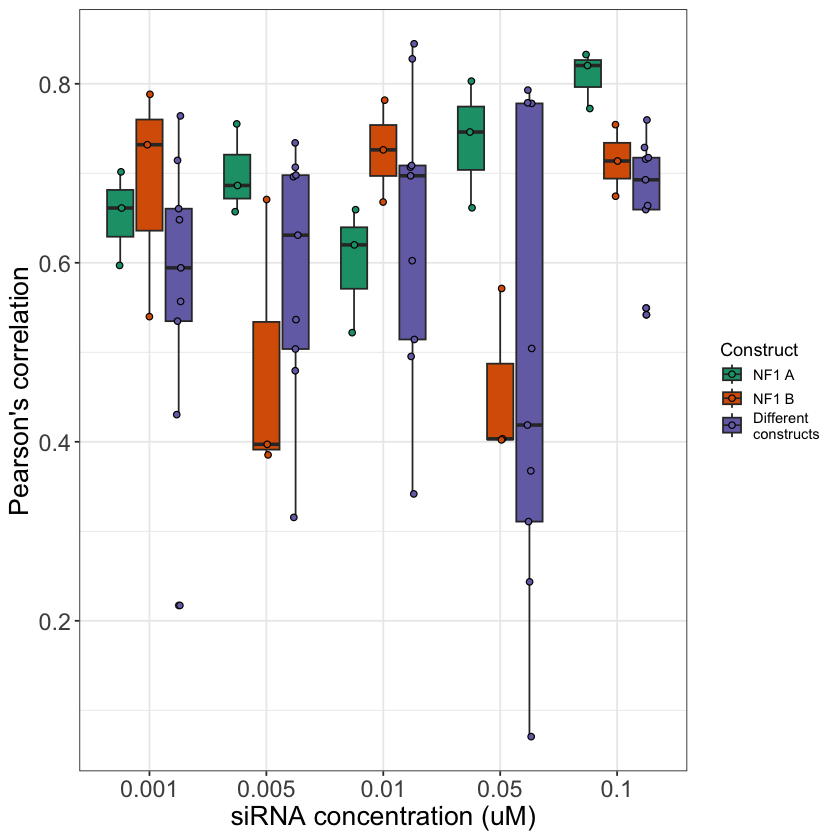

In [6]:
nf1_construct_gg <- (
    ggplot(correlation_df,
           aes(
               x = concentration,
               y = pearsons_coef,
               fill = construct_comparison
           )
          )
    + geom_boxplot()
    + geom_jitter(
        aes(color = construct_comparison),
        position = position_jitterdodge(
            jitter.width = 0.1,
            dodge.width = 0.75
        ),
        shape = 21,
        color = "black"
    )
    + labs(
        x = "siRNA concentration (uM)",
        y = "Pearson's correlation"
    )
    + scale_color_manual(
        name = "Construct",
        labels = construct_labels,
        values = construct_colors
    )
    + scale_fill_manual(
        name = "Construct",
        labels = construct_labels,
        values = construct_colors
    )
    + theme_bw()
    + figure_theme
)

# Save figure
ggsave(
    output_boxplot_file,
    nf1_construct_gg,
    height = 3,
    width = 7.5,
    dpi = 500
)

nf1_construct_gg

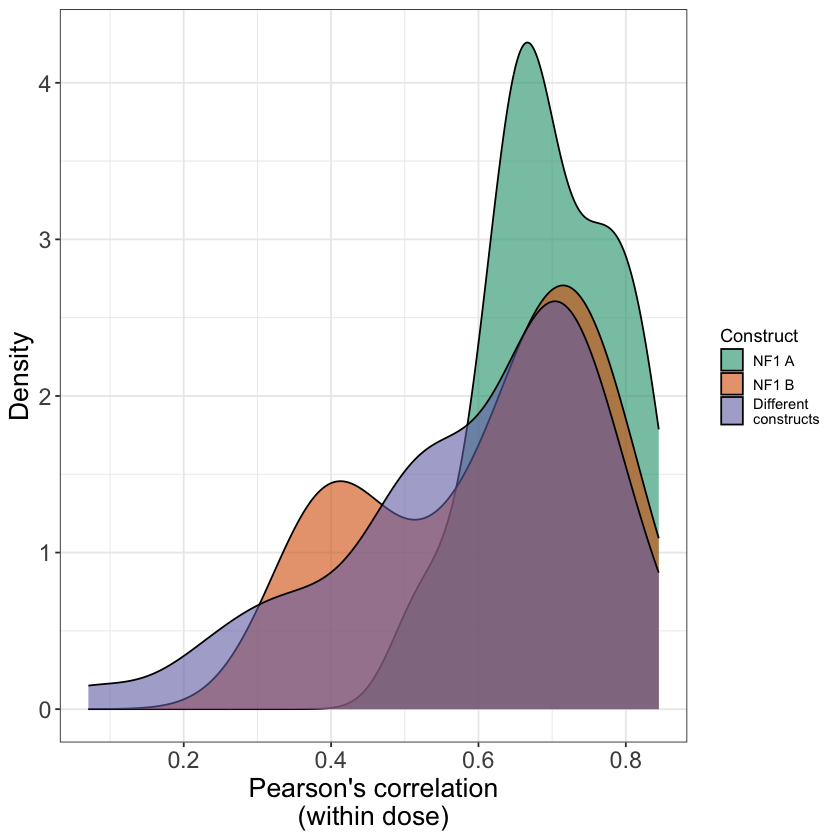

In [7]:
nf1_density_gg <- (
    ggplot(correlation_df,
           aes(
               x = pearsons_coef,
               fill = construct_comparison
           )
          )
    + geom_density(alpha = 0.6)
    + labs(x = "Pearson's correlation\n(within dose)", y = "Density")
    + scale_fill_manual(
        name = "Construct",
        labels = construct_labels,
        values = construct_colors
    )
    + theme_bw()
    + figure_theme
)

ggsave(
    output_density_file,
    nf1_density_gg,
    height = 4,
    width = 5,
    dpi = 500
)

nf1_density_gg